## Gradient descent로 Linear Regression 구해보기

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- X = number of claims (청구 수)
- Y = total payment for all the claims (청구에 따른 비용)

In [76]:
df = pd.read_csv('./data/slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [78]:
df['X']

0     108
1      19
2      13
3     124
4      40
     ... 
58      9
59     31
60     14
61     53
62     26
Name: X, Length: 63, dtype: int64

In [79]:
raw_X = df['X'].values.reshape(-1, 1)
y = df['Y'].values

In [81]:
raw_X.shape

(63, 1)

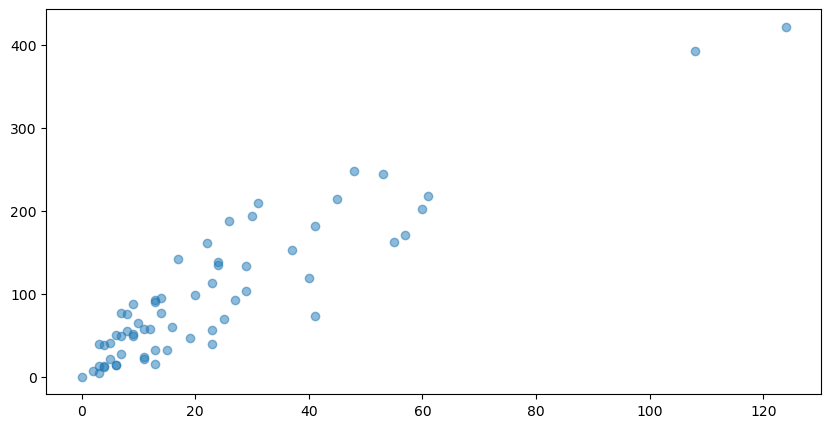

In [82]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o',alpha=0.5)

In [83]:
ones = np.ones((len(raw_X), 1))

In [84]:
X = np.concatenate((ones, raw_X), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [85]:
w = np.random.normal((2, 1))
w

array([4.49675294, 2.22477352])

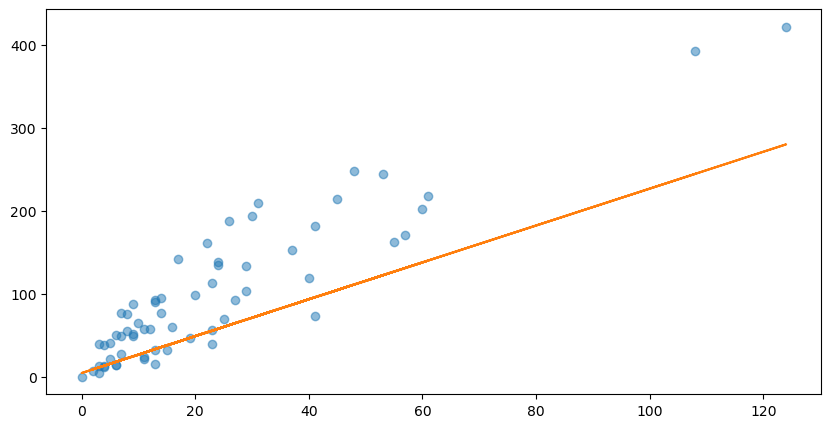

In [88]:
plt.figure(figsize=(10, 5))

y_predict = np.dot(X, w)
plt.plot(raw_X, y, 'o', alpha=0.5)
plt.plot(raw_X, y_predict)

### Hypothesis and cost function

In [89]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [92]:
# 여기서 h는 벡터 형태이다.
h = hypothesis_function(X, w)

In [94]:
h.shape

(63,)

### cost function
$J(w_0, w_1) = {1\over2m}\sum_{i=1}^{m}{(w_1x^{(i)} + w_0 - y^{(i)})^2}$  

In [95]:
def cost_function(h, y): 
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [96]:
cost_function(h, y)

1917.7842556751175

### Gradient descent

In [99]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        # 기존값 - (alpha * 미분한 거에 X 넣은 것)
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])

        # 새로운 theta로 업데이트
        theta = np.array([t0, t1])
        
        # 10번에 한번씩 저장
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [100]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.89591956  3.41595184]
cost: 625.3734210455201


In [103]:
theta_list = np.array(theta_list)

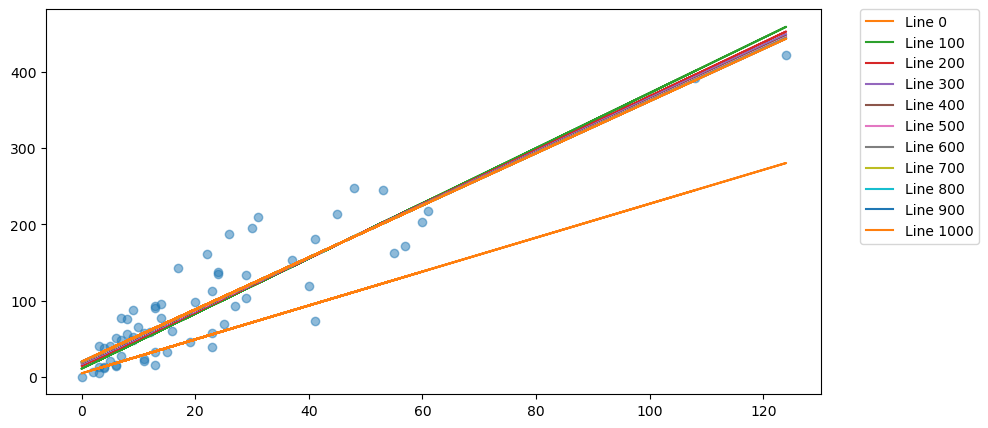

In [104]:
plt.figure(figsize=(10, 5))

y_predict_step = np.dot(X, theta_list.transpose())
plt.plot(raw_X, y, 'o', alpha=0.5)
for i in range(0, len(cost_list), 100):
    plt.plot(raw_X, y_predict_step[:, i], label='Line %d' %i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()